<h1>Lets Grow More, Task 1</h1>

<h2>Iris Flower's Classification ML Project<h2>

<h3><i><b>Importing Libraries</b></i></h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

<h3><i><b>Read Data</b></i></h3>

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.rename( columns={"sepallength":"Sepal_Length","sepalwidth":"Sepal_Width","petallength":"Petal_Length","petalwidth":"Petal_Width","class":"Species"}, inplace=True)

In [5]:
iris.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 5)

In [7]:
list(iris.columns)

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal_Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal_Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<h3><i><b>Finding Missing Values</b></i></h3>

In [10]:
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

<i>There is no null value in the data.</i>

<h3><i><b>Finding Duplicated Values</b></i></h3>

In [11]:
iris[iris.duplicated()==True]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


<i>There are three duplicates so we should first check if the data is balanced or not</i>

In [12]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<i>We can see that all the three Species have same number of records so we should not delete the entries as it may imbalance the dataset and it may not provide useful for valuable insights</i>

<h3><i><b>Data Visualization </b></i></h3>

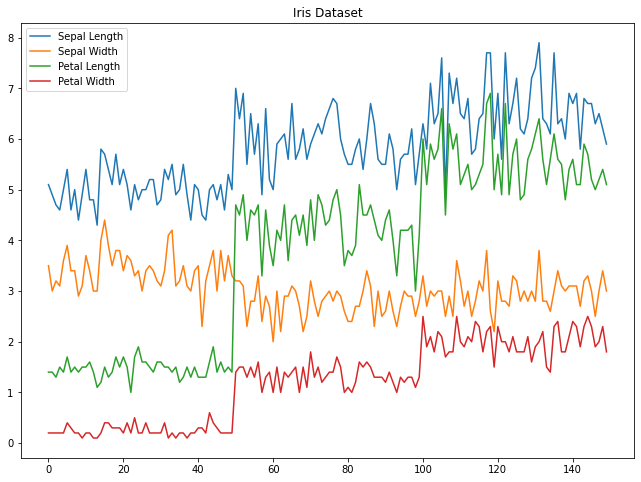

In [13]:
# get columns to plot
columns = iris.columns.drop(['Species'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis

fig, ax = plt.subplots(figsize=(11,8))
# plot each column
for column in columns:
    ax.plot(x_data, iris[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend(['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width'])

In [14]:
sns.set(rc={"figure.figsize":(11, 8)})

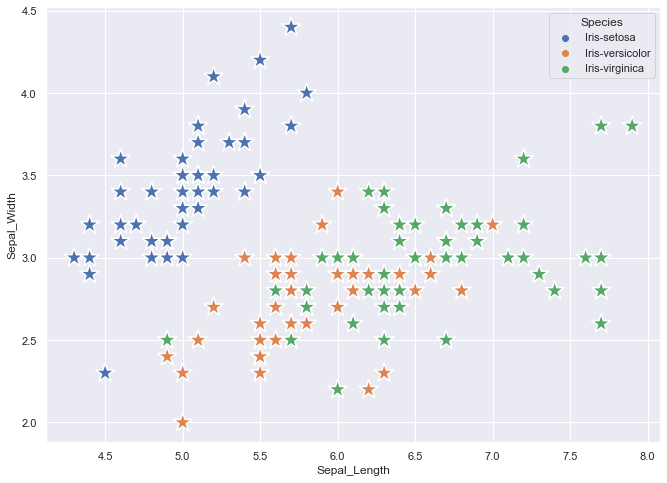

In [15]:
sns.scatterplot(x='Sepal_Length', y='Sepal_Width',hue='Species',data=iris, marker="*", s = 400 )
plt.show()

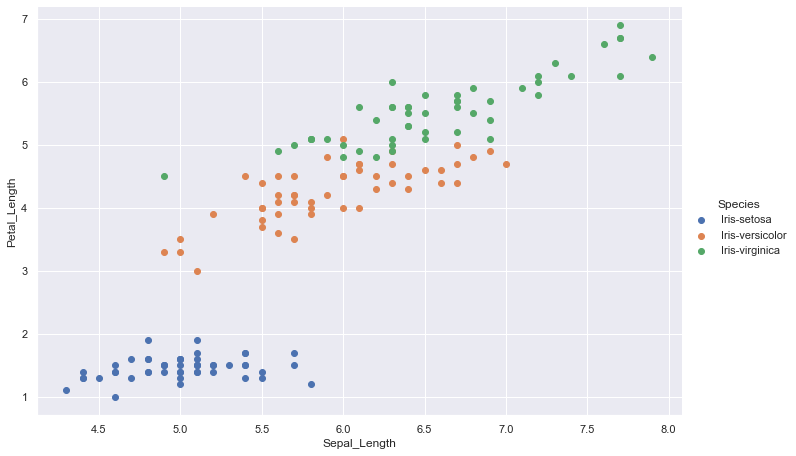

In [16]:
sns.FacetGrid(iris, hue ="Species",height=6.5, aspect=1.5).map(plt.scatter ,'Sepal_Length','Petal_Length').add_legend()
plt.show()

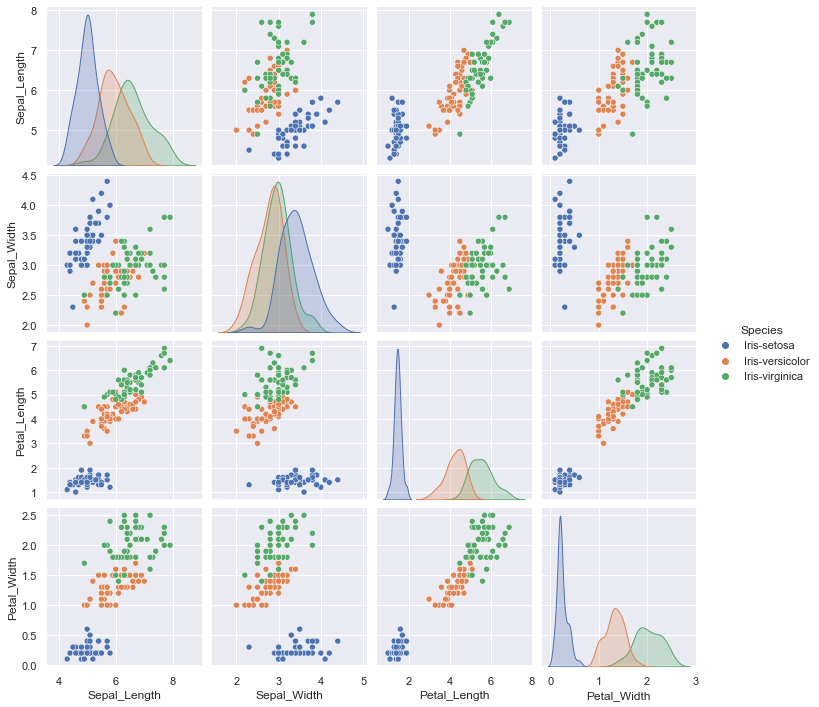

In [17]:
sns.pairplot(iris, hue='Species', aspect =1)
plt.show()

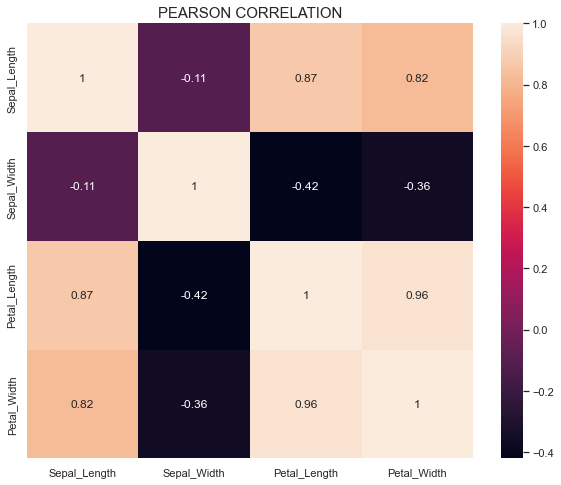

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(iris.corr(method="pearson"),annot=True)
plt.title('PEARSON CORRELATION', fontsize=15)
plt.show()

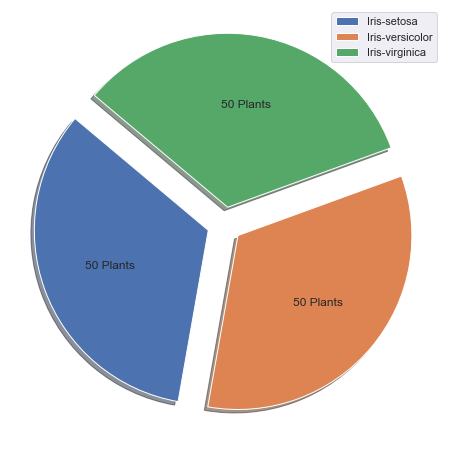

In [19]:
total = iris['Species'].value_counts().sum()
plt.pie(x=iris['Species'].value_counts(), explode=(0.1,0.1,0.1), 
autopct=lambda p: '{:.0f} Plants'.format(p * total / 100), shadow=True, startangle=140)
plt.legend(iris['Species'].unique())
plt.show()


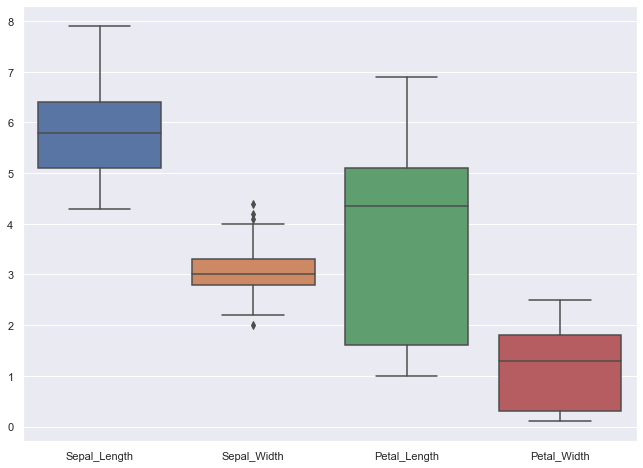

In [20]:
sns.boxplot(data=iris)
plt.show()

<h3><i><b>Removing Outliers</b></i></h3>

Old Shape:  (150, 5)
New Shape:  (146, 5)


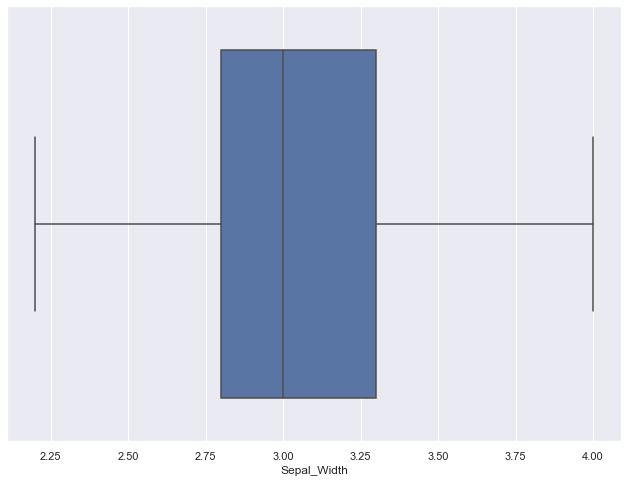

In [21]:
# IQR
Q1 = np.percentile(iris['Sepal_Width'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(iris['Sepal_Width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", iris.shape)
  
# Upper bound
upper = np.where(iris['Sepal_Width'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(iris['Sepal_Width'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
iris.drop(upper[0], inplace = True)
iris.drop(lower[0], inplace = True)
  
print("New Shape: ", iris.shape)
  
sns.boxplot(x='Sepal_Width', data=iris)
plt.show()

<h3><b><i>Encoding Target Column </i></b></h3>

In [22]:
import sklearn.preprocessing as pre

In [23]:
label_encoder = pre.LabelEncoder()

In [24]:
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  146 non-null    float64
 1   Sepal_Width   146 non-null    float64
 2   Petal_Length  146 non-null    float64
 3   Petal_Width   146 non-null    float64
 4   Species       146 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


In [26]:
iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 146, dtype: int32

<h3><b><i>Model Preperation</i></b></h3>

In [40]:
import sklearn.model_selection as model 
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
input = iris.drop('Species', axis =1)

In [29]:
output = iris['Species']

In [30]:
x_train,x_test,y_train,y_test=model.train_test_split(input,output,test_size=0.2,random_state=10)

<h3><b><i>Decision Tree Classifier</i></b></h3>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dtc.predict(x_test)

In [57]:
list(y_pred)[0:10]

[2, 2, 1, 1, 1, 2, 0, 0, 2, 1]

In [58]:
y_test[0:10]

144    2
101    2
56     1
59     1
88     1
125    2
10     0
25     0
142    2
50     1
Name: Species, dtype: int32

In [64]:
DT = confusion_matrix(y_test,y_pred)
DT

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]], dtype=int64)

In [62]:
Acc_DT = accuracy_score(y_test,y_pred).round(4)
Acc_DT

1.0

<AxesSubplot:>

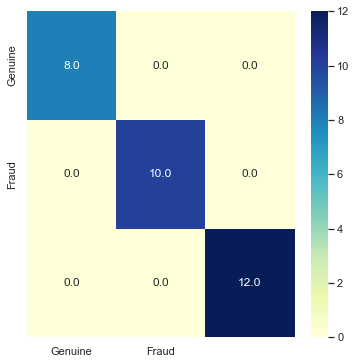

In [63]:
plt.figure(figsize = (6,6))
sns.heatmap(DT,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])

<h3><b><i>Support Vector Classifier</i></b></h3>

In [44]:
from sklearn.svm import SVC

In [45]:
svn = SVC()

In [46]:
svn.fit(x_train, y_train)

SVC()

In [47]:
svm_pred = svn.predict(x_test)

In [50]:
y_test[0:10]

144    2
101    2
56     1
59     1
88     1
125    2
10     0
25     0
142    2
50     1
Name: Species, dtype: int32

In [52]:
list(svm_pred)[0:10]

[2, 2, 1, 1, 1, 2, 0, 0, 2, 1]

In [65]:
SVC_cm = confusion_matrix(y_test, svm_pred)
SVC_cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]], dtype=int64)

In [66]:
Acc_SVM = accuracy_score(y_test,svm_pred).round(4)
Acc_SVM

1.0

<AxesSubplot:>

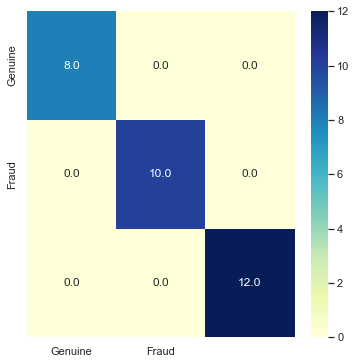

In [67]:
plt.figure(figsize = (6,6))
sns.heatmap(DT,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])